/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:77: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined = combined.groupby('year', group_keys=False).apply(drop_first_and_last_week)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:77: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined = combined.groupby('year', group_keys=False).apply(drop_first_and_last_week)
/Users/adriennekirk/Desktop/

<Figure size 1500x800 with 0 Axes>

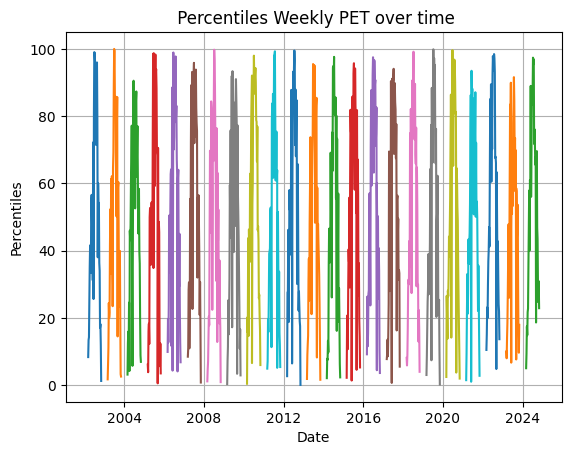

<Figure size 1500x800 with 0 Axes>

In [6]:
import sys
%matplotlib inline
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 
from FlashDroughts import DroughtDetection
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import scipy.stats as stats
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.gridspec as gridspec
import scipy.stats
from scipy.stats import gaussian_kde

kde = KDEhistogram(
    sdate='2002-03-01',
    edate='2024-10-31',
    lat=43.66,
    lon=-70.26
)
spring = kde.weekly('spring')
summer = kde.weekly('summer')
fall = kde.weekly('fall')

spring.index = pd.to_datetime(spring.index, errors='coerce')
summer.index = pd.to_datetime(summer.index, errors='coerce')
fall.index = pd.to_datetime(fall.index, errors='coerce')

weekly = pd.concat([spring, summer, fall])
weekly = weekly.sort_index()
pet = weekly['pet'].dropna()
weekly['pet_percentile'] = weekly['pet'].rank(pct=True) * 100

for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['pet_percentile'])
plt.title(" Percentiles Weekly PET over time")
plt.xlabel("Date")
plt.ylabel("Percentiles")
plt.grid(True)
plt.figure(figsize=(15, 8))



<Figure size 1500x800 with 0 Axes>

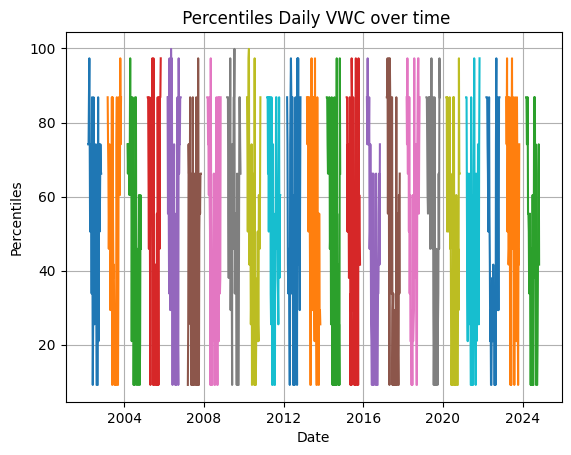

<Figure size 1500x800 with 0 Axes>

In [9]:
vwc = weekly['vwc'].dropna()
weekly['vwc_percentile'] = weekly['vwc'].rank(pct=True) * 100

for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['vwc_percentile'])
plt.title(" Percentiles Daily VWC over time")
plt.xlabel("Date")
plt.ylabel("Percentiles")
plt.grid(True)
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

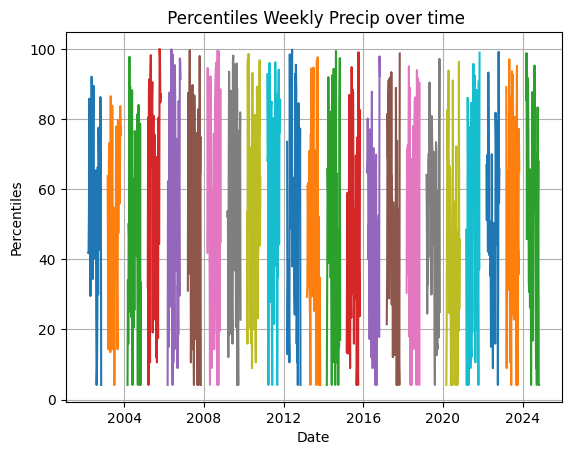

<Figure size 1500x800 with 0 Axes>

In [8]:
precip = weekly['precip'].dropna()
weekly['precip_percentile'] = weekly['precip'].rank(pct=True) * 100

for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['precip_percentile'])
plt.title(" Percentiles Weekly Precip over time")
plt.xlabel("Date")
plt.ylabel("Percentiles")
plt.grid(True)
plt.figure(figsize=(15, 8))

In [15]:
spring_r = kde.residuals('spring', 'pet')
summer_r = kde.residuals('summer', 'pet')
fall_r = kde.residuals('fall', 'pet')

spring_r.index = pd.to_datetime(spring_r.index, errors='coerce')
summer_r.index = pd.to_datetime(summer_r.index, errors='coerce')
fall_r.index = pd.to_datetime(fall_r.index, errors='coerce')

weekly_r = pd.concat([spring_r, summer_r, fall_r])
weekly_r = weekly_r.sort_index() 


pet_r = weekly_r['pet Residuals'].dropna()
weekly_r['pet residuals percentile'] = weekly_r['pet Residuals'].rank(pct=True) * 100

for year, group in weekly_r.groupby('year'):
    plt.plot(group.index, group['pet residuals percentile'])
plt.title(" Percentiles Weekly PET Residuals over time")
plt.xlabel("Date")
plt.ylabel("Percentiles")
plt.grid(True)
plt.figure(figsize=(15, 8))

/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:77: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined = combined.groupby('year', group_keys=False).apply(drop_first_and_last_week)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:77: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined = combined.groupby('year', group_keys=False).apply(drop_first_and_last_week)


TypeError: arg must be a list, tuple, 1-d array, or Series

/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:77: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined = combined.groupby('year', group_keys=False).apply(drop_first_and_last_week)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:77: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined = combined.groupby('year', group_keys=False).apply(drop_first_and_last_week)
/Users/adriennekirk/Desktop/

<Figure size 1500x800 with 0 Axes>

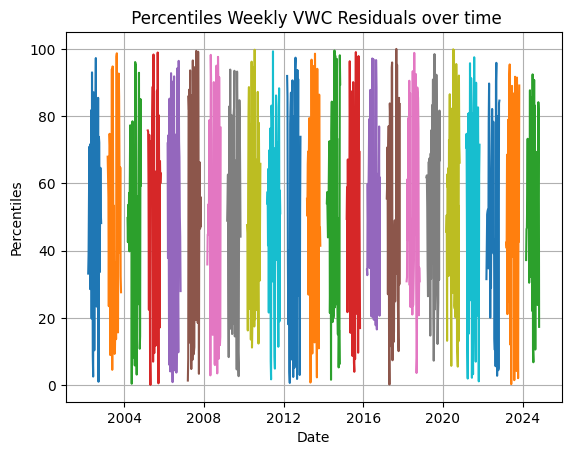

<Figure size 1500x800 with 0 Axes>

In [16]:
spring_r = kde.residuals('spring', 'vwc')
summer_r = kde.residuals('summer', 'vwc')
fall_r = kde.residuals('fall', 'vwc')

spring_r.index = pd.to_datetime(spring_r.index, errors='coerce')
summer_r.index = pd.to_datetime(summer_r.index, errors='coerce')
fall_r.index = pd.to_datetime(fall_r.index, errors='coerce')

weekly_r = pd.concat([spring_r, summer_r, fall_r])
weekly_r = weekly_r.sort_index() 

vwc_r = weekly_r['vwc Residuals'].dropna()
weekly_r['vwc residuals percentile'] = weekly_r['vwc Residuals'].rank(pct=True) * 100

for year, group in weekly_r.groupby('year'):
    plt.plot(group.index, group['vwc residuals percentile'])
plt.title(" Percentiles Weekly VWC Residuals over time")
plt.xlabel("Date")
plt.ylabel("Percentiles")
plt.grid(True)
plt.figure(figsize=(15, 8))